#### About
Startup success prediction.
Dataset - https://www.kaggle.com/datasets/manishkc06/startup-success-prediction

In [61]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold,cross_val_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, accuracy_score,classification_report, confusion_matrix


In [62]:
dataset_path = "/home/suraj/ClickUp/Mar-Apr/data/startup data.csv"

In [63]:
df = pd.read_csv(dataset_path)
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [64]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [65]:
# displaying number of missing values
df.isnull().sum().sort_values(ascending=False)

closed_at                   588
Unnamed: 6                  493
age_last_milestone_year     152
age_first_milestone_year    152
state_code.1                  1
Unnamed: 0                    0
is_biotech                    0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_othercategory              0
is_consulting                 0
is_otherstate                 0
object_id                     0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
category_code                 0
is_NY                         0
is_TX                         0
first_funding_at              0
latitude                      0
longitud

In [66]:
# analysing the percentage of missing values before dropping them
#mostly for the ones that have highest missing values
print("Percent of missing values in 'closed_at' column is {}".format(df['closed_at'].isnull().sum()/len(df)*100))
print("Percent of missing values in 'Unnamed: 6' column is {}".format(df['Unnamed: 6'].isnull().sum()/len(df)*100))
print("Percent of missing values in 'age last milestone year' column is {}".format(df['age_last_milestone_year'].isnull().sum()/len(df)*100))
print("Percent of missing values in 'age first milestone year' column is {}".format(df['age_first_milestone_year'].isnull().sum()/len(df)*100))


Percent of missing values in 'closed_at' column is 63.705308775731304
Percent of missing values in 'Unnamed: 6' column is 53.412784398699884
Percent of missing values in 'age last milestone year' column is 16.468039003250272
Percent of missing values in 'age first milestone year' column is 16.468039003250272


In [67]:
#dropping closed_at and Unnamed:6 columns along with id,state_code.1(redundant) Also unnamed:0
cols_to_drop = ['id','Unnamed: 0','Unnamed: 6','closed_at','state_code.1','labels']
df.drop(cols_to_drop,axis=1,inplace=True)
df 

,state_code,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1/1/2009,7/9/2009,7/9/2009,0.5178,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,1/1/1998,4/1/2005,3/23/2007,7.2521,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,1/1/1999,6/29/2007,6/29/2007,8.4959,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1/1/2009,10/5/2009,11/1/2011,0.7589,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [68]:
df

,state_code,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1/1/2009,7/9/2009,7/9/2009,0.5178,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,1/1/1998,4/1/2005,3/23/2007,7.2521,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,1/1/1999,6/29/2007,6/29/2007,8.4959,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1/1/2009,10/5/2009,11/1/2011,0.7589,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [69]:
#checking the startups that are acquired or closed
print(df[(df['status']=='acquired')].shape)
print(df[(df['status']=='closed')].shape)

(597, 43)
(326, 43)


In [70]:
#mapping status
df['status'] = df.status.map({'acquired':1, 'closed':0})


In [71]:
df

,state_code,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,2.2493,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,5.1260,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,3.1315,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,0.0000,...,c:65806,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,1/1/2009,7/9/2009,7/9/2009,0.5178,...,c:21343,0,0,1,0,0,0,6.0000,1,1
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,1/1/1998,4/1/2005,3/23/2007,7.2521,...,c:41747,1,0,0,1,0,0,2.6667,1,0
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,1/1/1999,6/29/2007,6/29/2007,8.4959,...,c:31549,0,0,0,0,0,1,8.0000,1,0
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,1/1/2009,10/5/2009,11/1/2011,0.7589,...,c:33198,0,0,1,1,0,0,1.0000,1,1


In [72]:
#converting all the columns that contains year i.e founded_at, first_funding, last_funding to datetime type 
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])
df

,state_code,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,2007-01-01,2009-04-01,2010-01-01,2.2493,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,2000-01-01,2005-02-14,2009-12-28,5.1260,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,2009-03-18,2010-03-30,2010-03-30,1.0329,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,2002-01-01,2005-02-17,2007-04-25,3.1315,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,2010-08-01,2010-08-01,2012-04-01,0.0000,...,c:65806,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,San Francisco,CoTweet,2009-01-01,2009-07-09,2009-07-09,0.5178,...,c:21343,0,0,1,0,0,0,6.0000,1,1
919,MA,42.504817,-71.195611,1803,Burlington,Reef Point Systems,1998-01-01,2005-04-01,2007-03-23,7.2521,...,c:41747,1,0,0,1,0,0,2.6667,1,0
920,CA,37.408261,-122.015920,94089,Sunnyvale,Paracor Medical,1999-01-01,2007-06-29,2007-06-29,8.4959,...,c:31549,0,0,0,0,0,1,8.0000,1,0
921,CA,37.556732,-122.288378,94404,San Francisco,Causata,2009-01-01,2009-10-05,2011-11-01,0.7589,...,c:33198,0,0,1,1,0,0,1.0000,1,1


In [73]:
#counting categorical values
categorical_variables = ['state_code','zip_code','city','name','status','founded_at','first_funding_at','last_funding_at','state_code','category_code','object_id']
for col in categorical_variables:
    print(df[col].value_counts())
    print()

CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NJ      7
OR      7
NC      7
MD      7
FL      6
OH      6
MN      5
CT      4
DC      4
MI      3
UT      3
TN      3
RI      3
IN      2
KY      2
AZ      2
ME      2
NH      2
MO      2
NV      2
ID      1
WI      1
WV      1
NM      1
AR      1
Name: state_code, dtype: int64

94107       30
94105       23
95054       20
94103       19
94043       18
            ..
60607        1
78731        1
CA 94105     1
6103         1
2906         1
Name: zip_code, Length: 382, dtype: int64

San Francisco    128
New York          91
Mountain View     47
Palo Alto         35
Austin            27
                ... 
Zeeland            1
Las Vegas          1
Waco               1
Kansas City        1
Chantilly          1
Name: city, Length: 221, dtype: int64

Redwood Systems               2
TrustDegrees                  1
Carbonetworks                 1
ShopWiki                      1
Tumblr      

<AxesSubplot:>

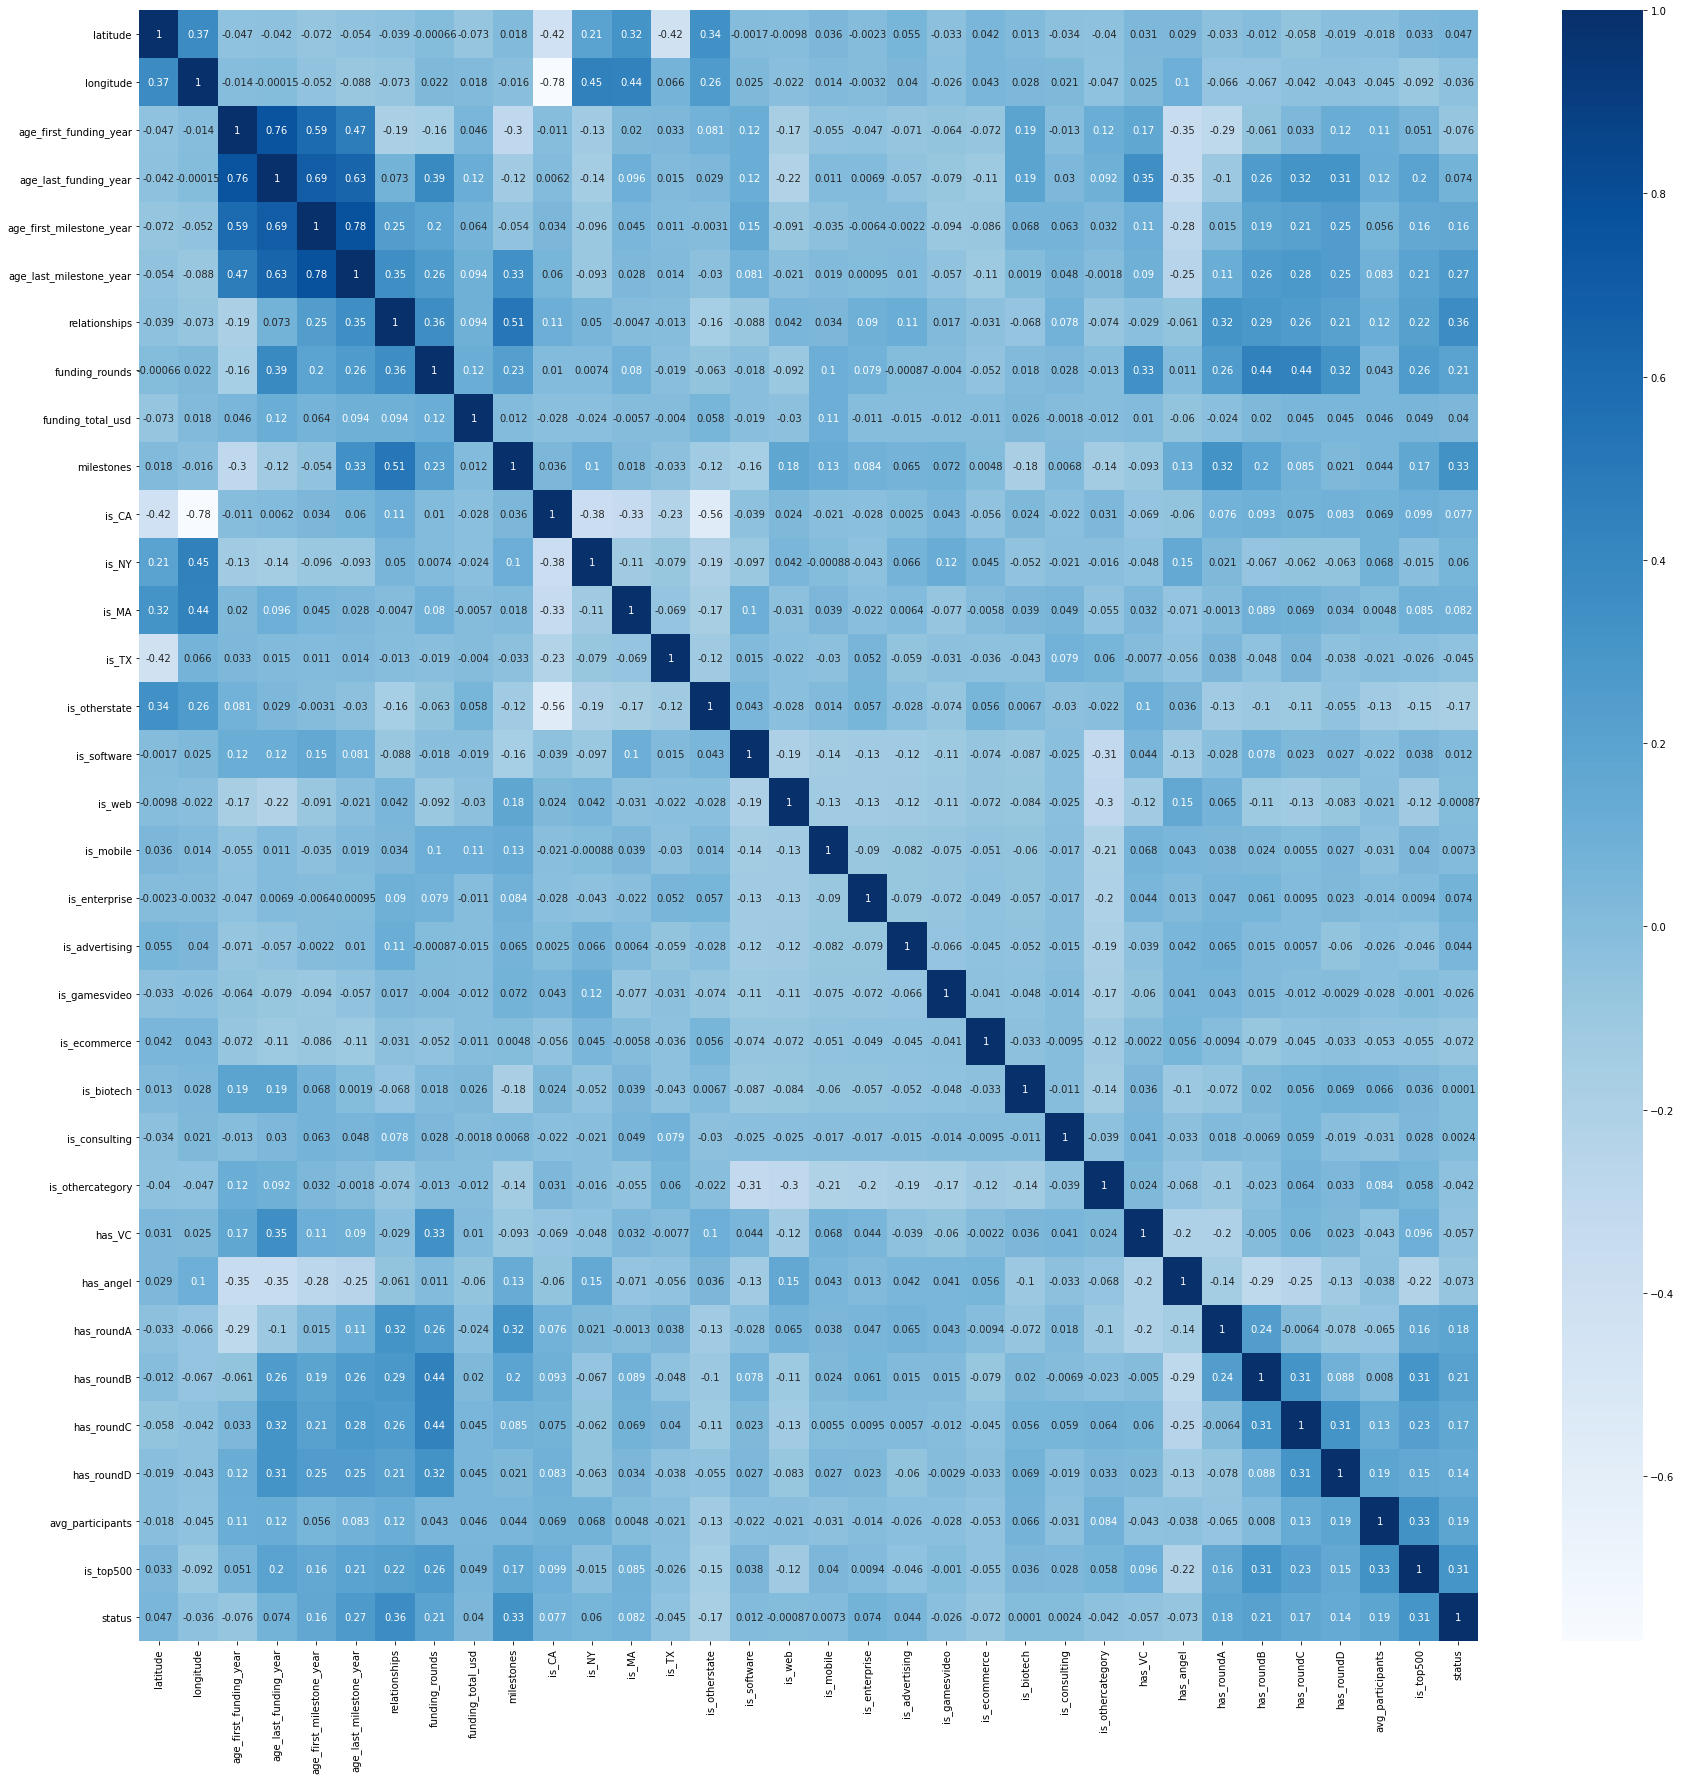

In [74]:
correlation_mat = df.corr()
f, ax = plt.subplots(figsize=(30, 30))

sns.heatmap(correlation_mat,cmap="Blues", annot=True)

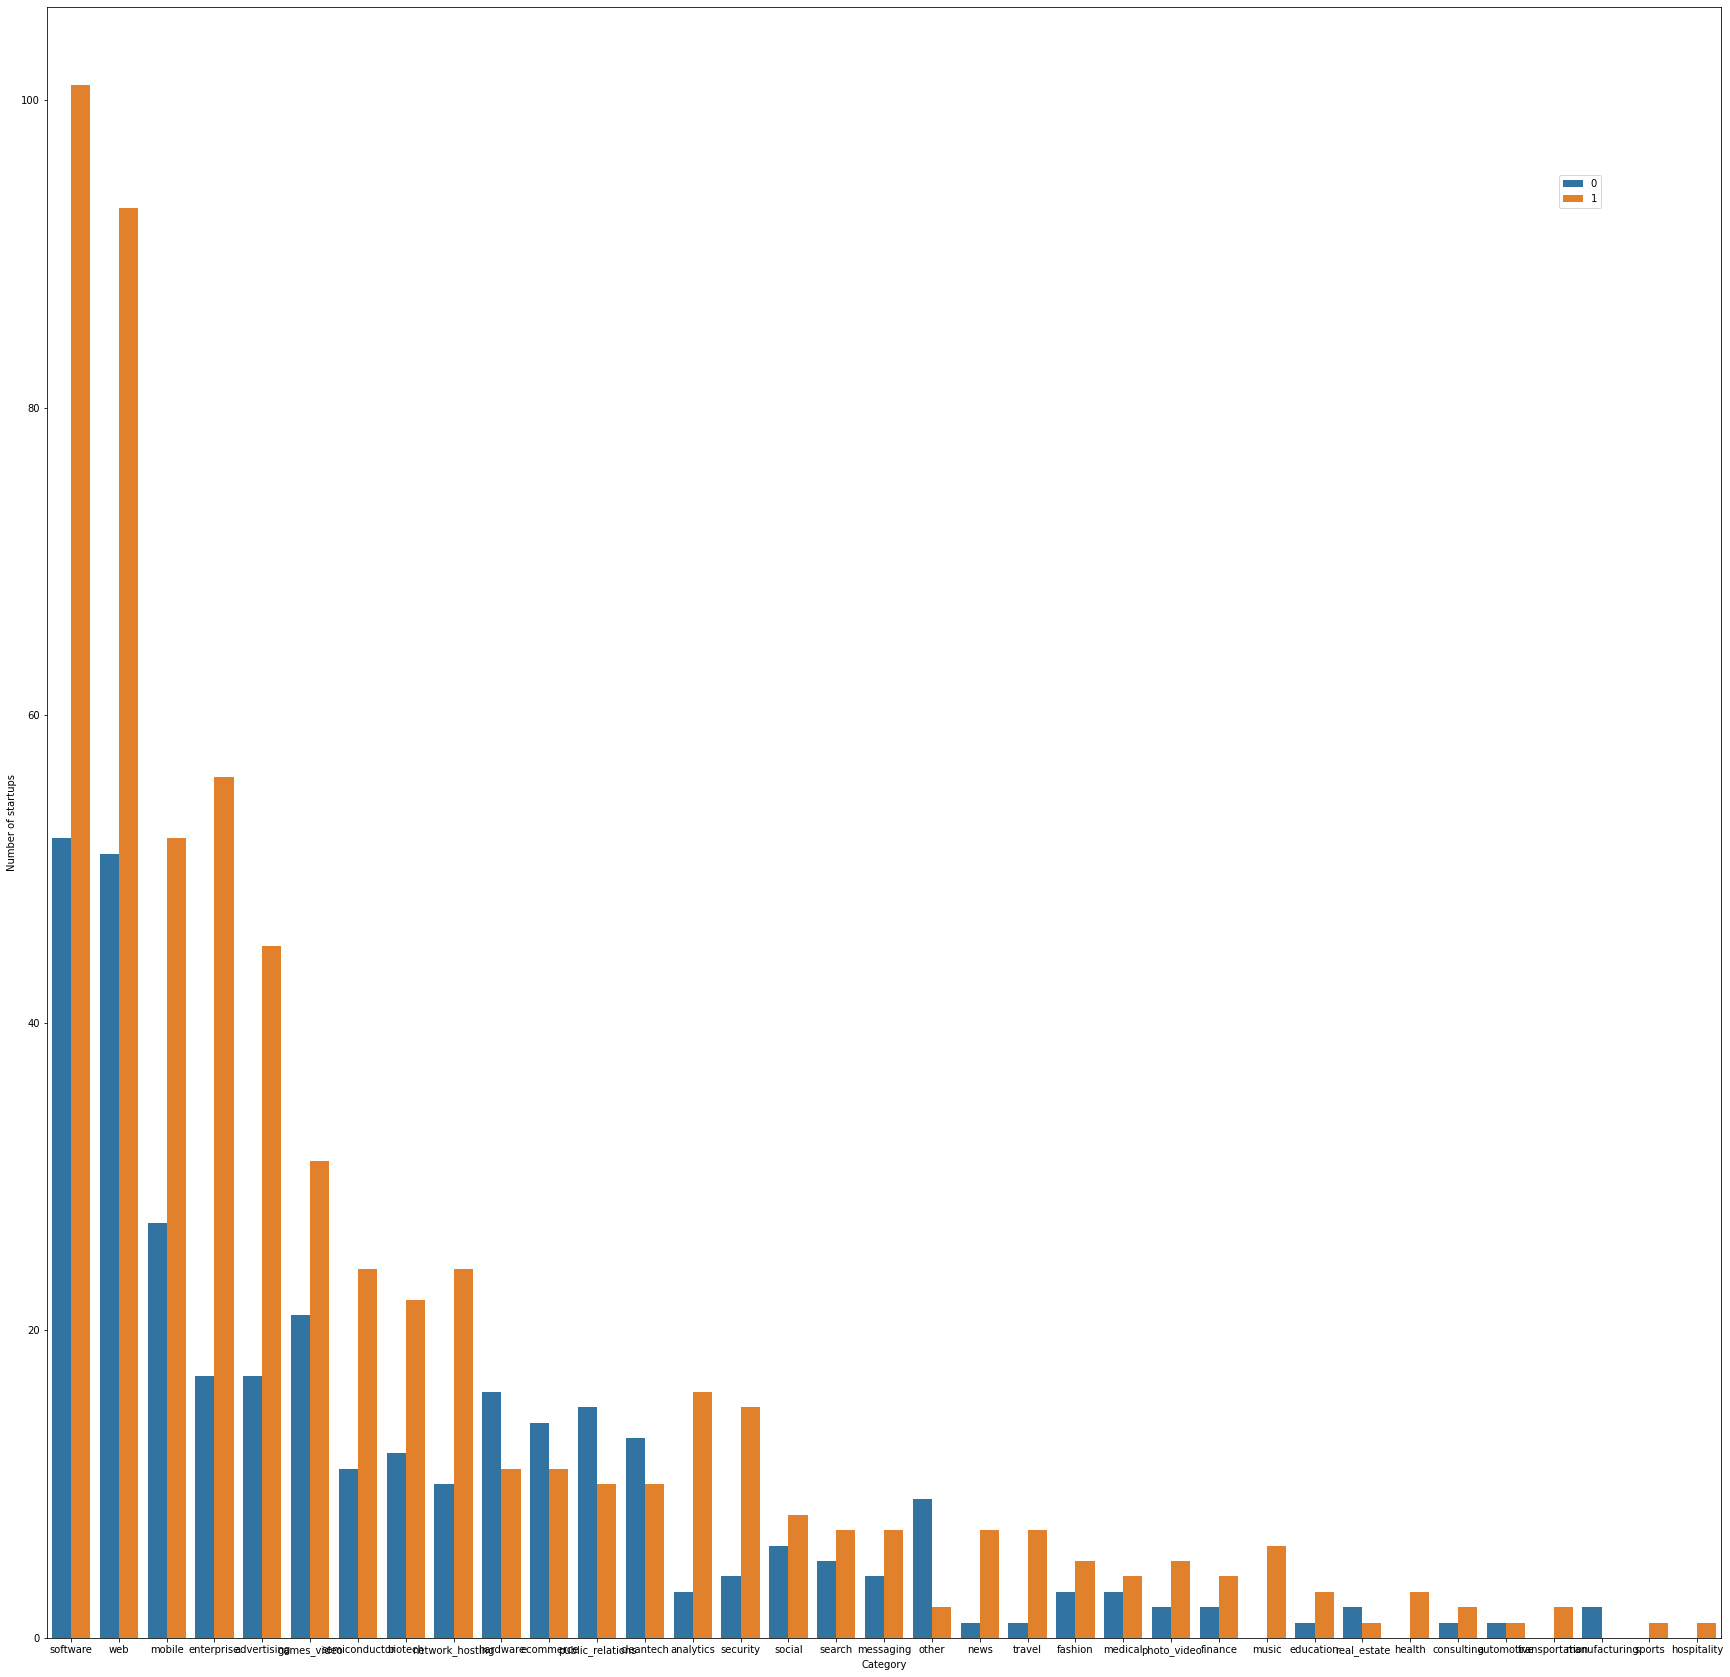

In [75]:
#category having largest number of startup
fig,ax = plt.subplots(figsize=(30,30))



plot = sns.countplot(x='category_code',hue='status', data=df, order= df.category_code.value_counts().index)
plot = ax.set(xlabel="Category", ylabel="Number of startups")
plt.legend(bbox_to_anchor=(0.9,0.9))




In [76]:
#category having largest success rate
data1 = df[df['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = df[df['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=df.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate


,category_code,total_success,total_closed,total_startup,success_rate
27,travel,7,1,8,87.50
17,news,7,1,8,87.50
1,analytics,16,3,19,84.21
23,security,15,4,19,78.95
8,enterprise,56,17,73,76.71
7,education,3,1,4,75.00
0,advertising,45,17,62,72.58
19,photo_video,5,2,7,71.43
16,network_hosting,24,10,34,70.59
24,semiconductor,24,11,35,68.57


In [77]:
# category having max total funding 
sorted_df = pd.pivot_table(df, index=['category_code'], values = ['funding_total_usd'], aggfunc = 'sum').reset_index()
sorted_df.columns = ['category_code','total_funding']
sorted_df = sorted_df.sort_values(['total_funding'],ascending=False)
sorted_df


,category_code,total_funding
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096
4,cleantech,1300284730
28,semiconductor,1105156970
0,advertising,918619012
11,games_video,844643530
12,hardware,773938873


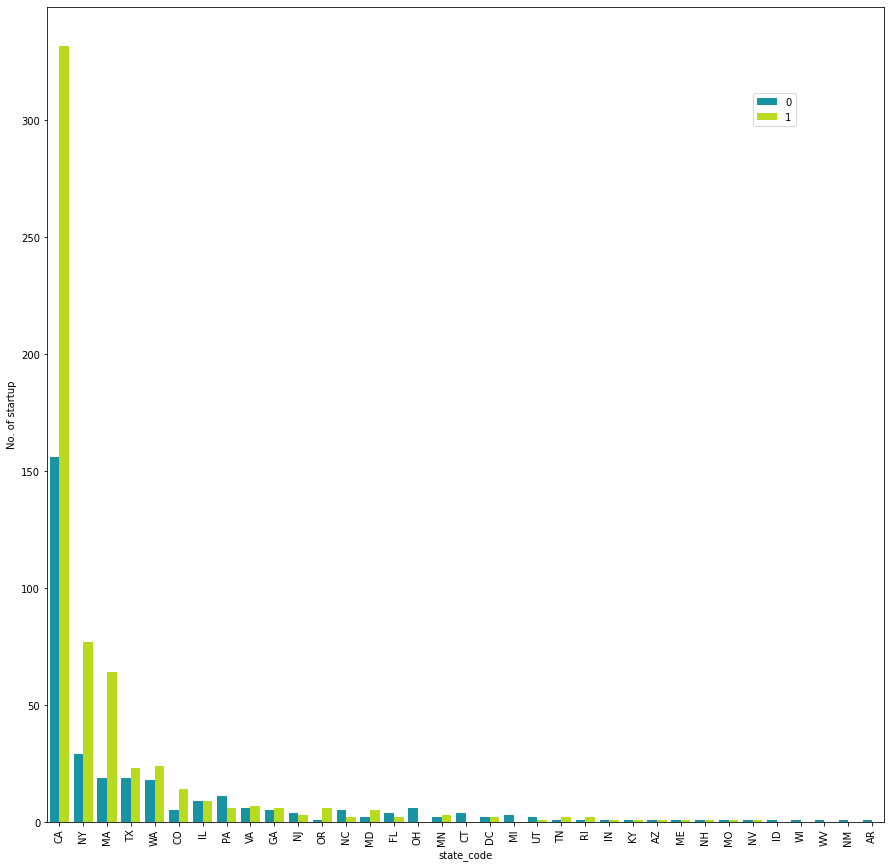

In [78]:
#state having most number of startup
fig, ax = plt.subplots(figsize=(15,15))

_ = sns.countplot(x="state_code", hue="status", data=df, palette="nipy_spectral",
              order=df.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.9, 0.9))


In [79]:
#remove duplicates
print("Length of df before dropping duplicates is {}".format(len(df)))
df.drop_duplicates(inplace=True)
print("Length of df after dropping duplicates is {}".format(len(df)))

Length of df before dropping duplicates is 923
Length of df after dropping duplicates is 923


In [80]:
df.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'city', 'name',
       'founded_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [81]:
#dropping unused columns for modelling
cols_to_drop2 = ['zip_code','founded_at','longitude','latitude','first_funding_at','last_funding_at','city','name','object_id']
df.drop(cols_to_drop2,axis=1,inplace=True)

In [82]:
df

,state_code,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,...,1,0,1,0,0,0,0,1.0000,0,1
1,CA,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,...,0,1,0,0,1,1,1,4.7500,1,1
2,CA,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,...,0,0,0,1,0,0,0,4.0000,1,1
3,CA,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,...,0,0,0,0,1,1,1,3.3333,1,1
4,CA,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,...,0,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,...,0,0,0,1,0,0,0,6.0000,1,1
919,MA,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,...,1,1,0,0,1,0,0,2.6667,1,0
920,CA,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,...,0,0,0,0,0,0,1,8.0000,1,0
921,CA,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,...,0,0,0,1,1,0,0,1.0000,1,1


In [83]:
df.drop('state_code',axis=1,inplace=True)

In [85]:
cols = ['relationships', 'milestones', 'is_top500', 'has_roundB', 'funding_rounds', 'age_last_milestone_year',
               'avg_participants', 'has_roundA', 'has_roundC', 'has_roundD', 'age_first_milestone_year', 'is_MA', 
               'is_CA', 'is_enterprise', 'age_last_funding_year', 'is_NY', 'is_advertising', 'is_advertising', 
               'funding_total_usd', 'is_software', 'is_mobile', 'is_consulting', 'is_biotech', 'is_biotech', 'is_web',
               'is_gamesvideo', 'is_othercategory', 'is_TX', 'has_VC', 'is_ecommerce', 'has_angel', 
               'age_first_funding_year', 'is_otherstate']
features = pd.get_dummies(df, columns=cols, drop_first=True)
label = df['status']

In [86]:
features

,relationships_1,relationships_2,relationships_3,relationships_4,relationships_5,relationships_6,relationships_7,relationships_8,relationships_9,relationships_10,...,age_first_funding_year_9.3534,age_first_funding_year_9.7315,age_first_funding_year_9.7534,age_first_funding_year_10.3644,age_first_funding_year_10.4247,age_first_funding_year_10.8795,age_first_funding_year_10.9068,age_first_funding_year_16.9863,age_first_funding_year_21.8959,is_otherstate_1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
919,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
920,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, label, test_size = 0.2, random_state = 42)

In [89]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (616, 2814)
Shape of the y Train : (616,)
Shape of the X test : (155, 2814)
Shape of the y test : (155,)


In [90]:
random_state=42
# preparing models
models = []
models.append(("Logistic Regression", LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(("Gradient Boosting", GradientBoostingClassifier()))
models.append(("AdaBoost", AdaBoostClassifier()))

In [91]:
results = []
names = []
scoring = 'accuracy'

In [92]:
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True,random_state=random_state)
    cv_results = cross_val_score(model, scaled_features, label, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.748368 (0.037336)
Decision Tree: 0.735448 (0.044412)
Random Forest: 0.773027 (0.039030)
Gradient Boosting: 0.771728 (0.044282)
AdaBoost: 0.749767 (0.058735)


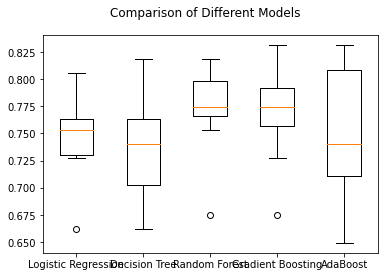

In [93]:
# boxplot for Comparison of Different Models
fig = plt.figure()
fig.suptitle('Comparison of Different Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [94]:
cls = GradientBoostingClassifier(random_state=7)
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)

In [95]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7806451612903226
[[ 15  25]
 [  9 106]]
              precision    recall  f1-score   support

           0       0.62      0.38      0.47        40
           1       0.81      0.92      0.86       115

    accuracy                           0.78       155
   macro avg       0.72      0.65      0.67       155
weighted avg       0.76      0.78      0.76       155



In [96]:
cls1 = RandomForestClassifier(random_state=7)
cls1.fit(X_train,y_train)
y_pred = cls1.predict(X_test)

In [97]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7935483870967742
[[ 11  29]
 [  3 112]]
              precision    recall  f1-score   support

           0       0.79      0.28      0.41        40
           1       0.79      0.97      0.88       115

    accuracy                           0.79       155
   macro avg       0.79      0.62      0.64       155
weighted avg       0.79      0.79      0.75       155

